In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

df = pd.read_csv('../data/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.columns = ['ds', 'y']

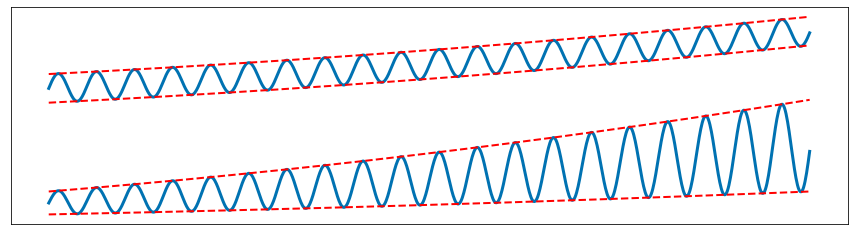

In [2]:
import numpy as np

multiplier = 5
spread = 3
separation = 10 * spread

x = np.linspace(1, 2, 1000)
y0 = [multiplier * val**2 for val in x]
y1 = [np.sin(idx * 7.2 * np.pi / 180) for idx in range(len(x))]

y = [y0[idx] + 1.25 * spread * y1[idx] for idx in range(len(x))]
upper = [y0[idx] + 1.25 * spread for idx in range(len(x))]
lower = [y0[idx] - 1.25 * spread for idx in range(len(x))]

plt.figure(figsize=(15, 4))
plt.plot(x, y, c='#0072B2', lw=3)
plt.plot(x, upper, c='r', lw=2, ls='--')
plt.plot(x, lower, c='r', lw=2, ls='--')

y = [y0[idx] + spread / multiplier * y0[idx] * y1[idx] - separation for idx in range(len(x))]
upper = [(multiplier + spread) * val**2 - separation for val in x]
lower = [(multiplier - spread) * val**2 - separation for val in x]

plt.plot(x, y, c='#0072B2', lw=3)
plt.plot(x, upper, c='r', lw=2, ls='--')
plt.plot(x, lower, c='r', lw=2, ls='--')

plt.xticks([])
plt.yticks([])
plt.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


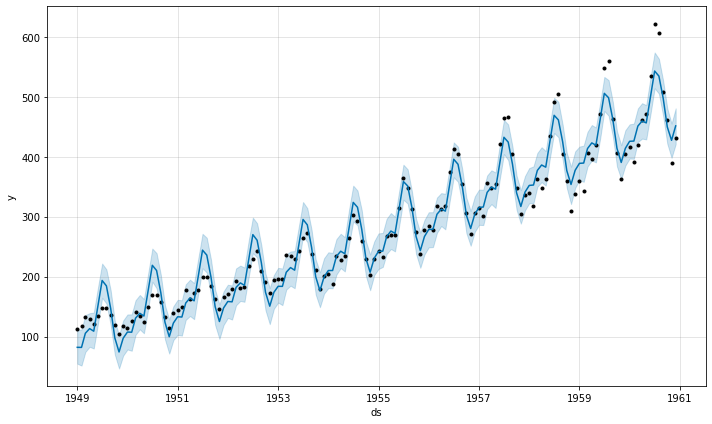

In [3]:
model_a = Prophet(seasonality_mode='additive',
                  yearly_seasonality=4)
model_a.fit(df)
forecast_a = model_a.predict()
fig_a = model_a.plot(forecast_a)
plt.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


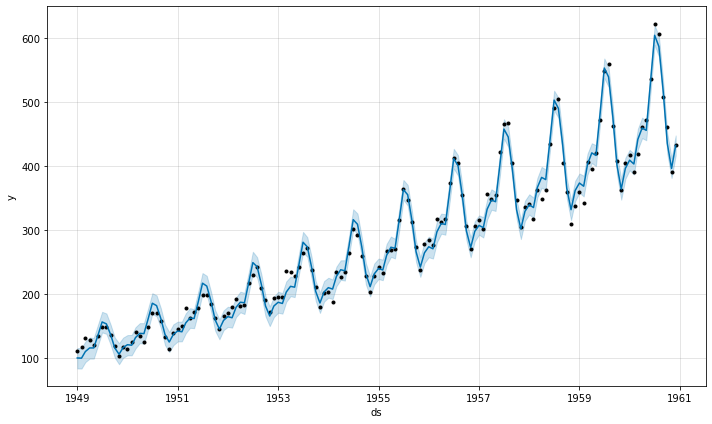

In [4]:
model_m = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=4)
model_m.fit(df)
forecast_m = model_m.predict()
fig_m = model_m.plot(forecast_m)
plt.show()

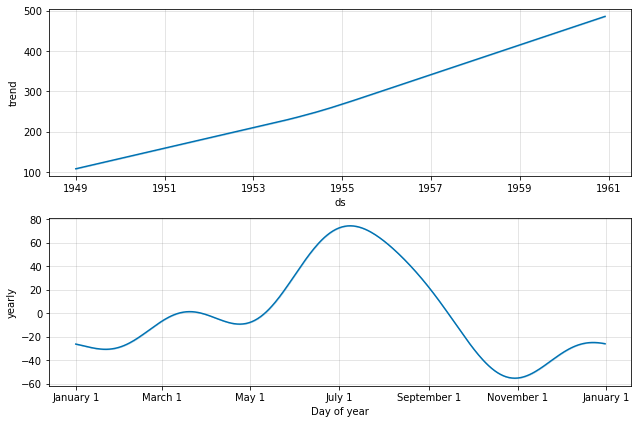

In [5]:
fig_a2 = model_a.plot_components(forecast_a)
plt.show()

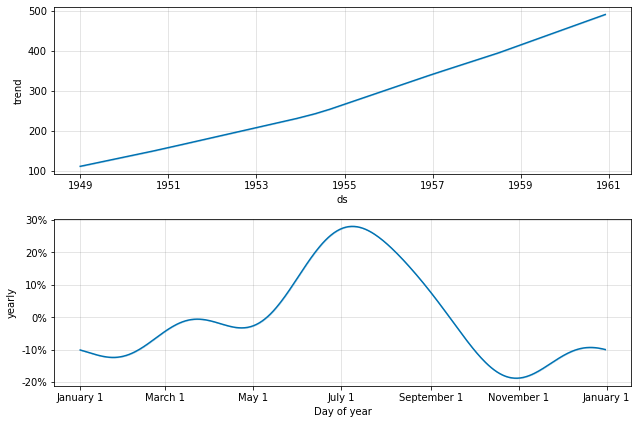

In [6]:
fig_m2 = model_m.plot_components(forecast_m)
plt.show()

In [7]:
df = pd.read_csv('../data/divvy_daily.csv')
df.head()

,date,rides,temperature,weather
0,1/1/2014,95,19.483158,rain or snow
1,1/2/2014,111,16.833333,rain or snow
2,1/3/2014,6,-5.633333,clear
3,1/4/2014,181,30.007735,rain or snow
4,1/5/2014,32,16.756250,rain or snow


In [8]:
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

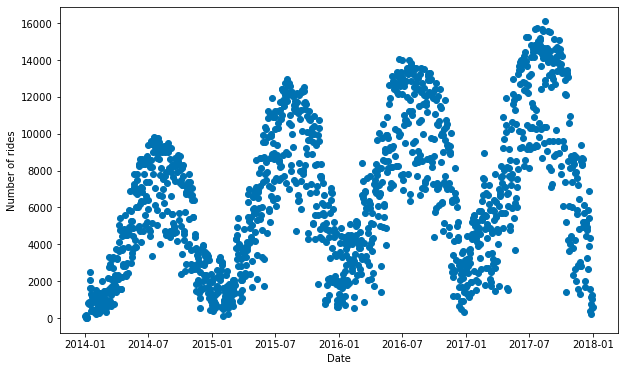

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='#0072B2')
plt.xlabel('Date')
plt.ylabel('Number of rides')
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


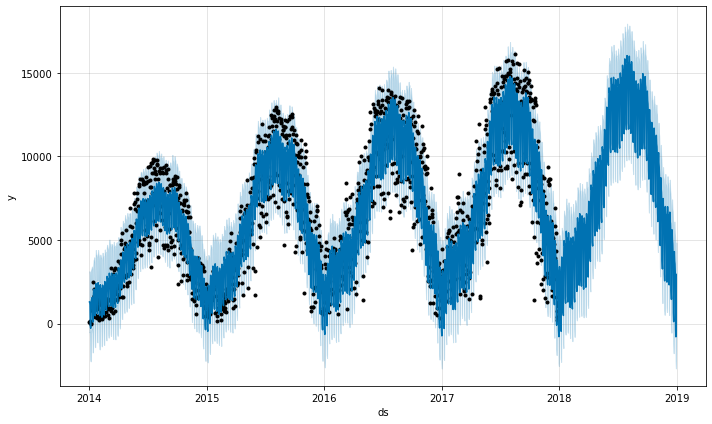

In [10]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

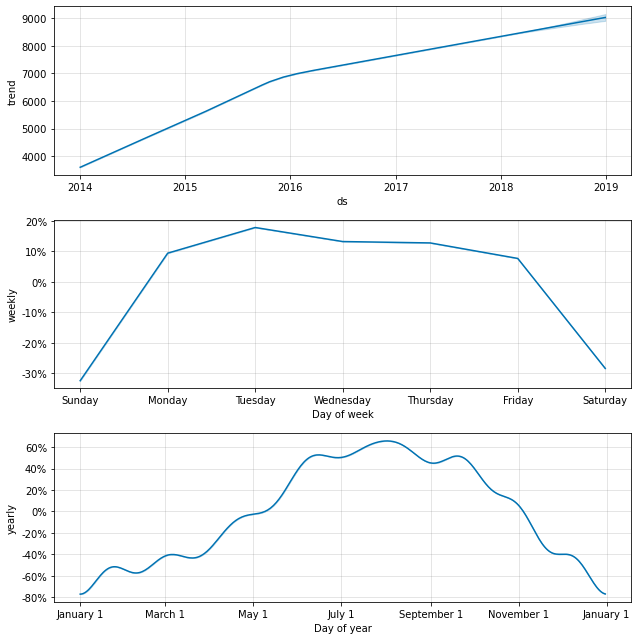

In [11]:
fig2 = model.plot_components(forecast)
plt.show()

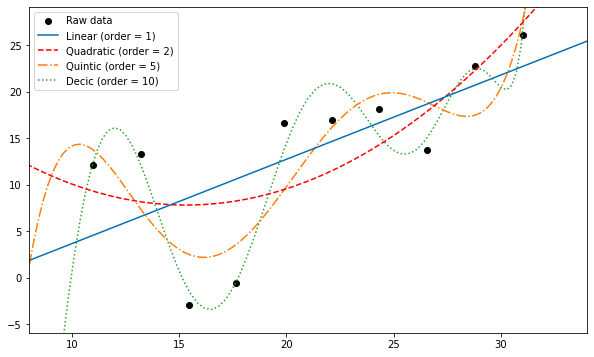

In [12]:
import statsmodels.formula.api as sm
import random
random.seed(2)

x = np.linspace(11, 31, 10)
y = np.array([.025 * val**2 + random.uniform(-10, 10) for val in x])
data = {"x": x, "y": y}
x2 = np.array([.025 * val**2 for val in np.linspace(1, 11, 80)] + 
              [.025 * val**2 for val in np.linspace(11, 31, 80)] +
              [.025 * val**2 for val in np.linspace(31, 41, 80)])

model1 = sm.ols(formula = 'y ~ x', data = data).fit()
model2 = sm.ols(formula = 'y ~ np.power(x, 2) + x', data = data).fit()
model5 = sm.ols(formula = 'y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4) + np.power(x, 5) + x', data = data).fit()
model10 = sm.ols(formula = 'y ~ x + np.power(x, 2) + \
                                     np.power(x, 3) + \
                                     np.power(x, 4) + \
                                     np.power(x, 5) + \
                                     np.power(x, 6) + \
                                     np.power(x, 7) + \
                                     np.power(x, 8) + \
                                     np.power(x, 9) + \
                                     np.power(x, 10)', data = data).fit()

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Raw data', c='k')

plt.plot(x2, model10.params[0] +
             model10.params[1] * x2 +
             model10.params[2] * x2**2 +
             model10.params[3] * x2**3 +
             model10.params[4] * x2**4 +
             model10.params[5] * x2**5 +
             model10.params[6] * x2**6 +
             model10.params[7] * x2**7 +
             model10.params[8] * x2**8 +
             model10.params[9] * x2**9 +
             model10.params[10] * x2**10,
         label='Decic (order = 10)', c='tab:green', ls=':')

plt.plot(x2, model5.params[0] +
             model5.params[1] * x2 +
             model5.params[2] * x2**2 +
             model5.params[3] * x2**3 +
             model5.params[4] * x2**4 +
             model5.params[5] * x2**5,
         label='Quintic (order = 5)', c='tab:orange', ls='-.')

plt.plot(x2, model2.params[0] +
             model2.params[1] * x2**2 +
             model2.params[2] * x2,
         label='Quadratic (order = 2)', c='r', ls='--')

plt.plot(x2, model1.params[0] +
             model1.params[1] * x2,
         label='Linear (order = 1)', c='#0072B2', ls='-')

plt.ylim(-5, 35)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels))
plt.xlim(x.min() - 3, x.max() + 3)
plt.ylim(y.min() - 3, y.max() + 3)
plt.show()

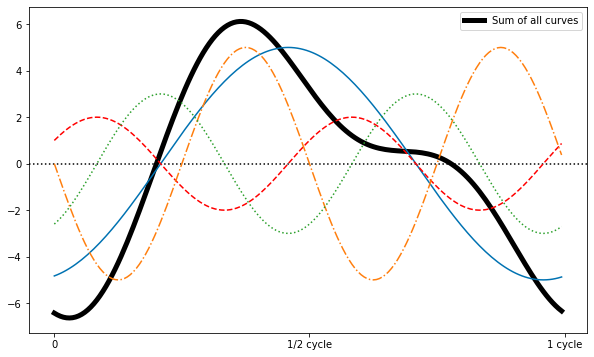

In [13]:
x = pd.date_range('2000-01-01', '2001-01-01', freq='H')
x = range(24 * 7)
y0 = [(-5 * np.sin(((idx / 7) - 17) * (360 / 24) * (np.pi / 180))) for idx in range(len(x))]
y1 = [(-2 * np.sin(((idx / 7) - 5) * (360 / 12) * (np.pi / 180))) for idx in range(len(x))]
y2 = [(-5 * np.sin(((idx / 7) - 12) * (360 / 12) * (np.pi / 180))) for idx in range(len(x))]
y3 = [(-3 * np.sin(((idx / 7) - 20) * (360 / 12) * (np.pi / 180))) for idx in range(len(x))]
y = [y0[idx] + y1[idx] + y2[idx] + y3[idx] for idx in range(len(x))]

plt.figure(figsize=(10, 6))
plt.axhline(0, ls=':', c='k')
plt.plot(y, lw=5, c='k', label='Sum of all curves')
plt.plot(y0, c='#0072B2', ls='-')
plt.plot(y1, c='r', ls='--')
plt.plot(y2, c='tab:orange', ls='-.')
plt.plot(y3, c='tab:green', ls=':')
plt.legend()
plt.xticks(ticks=[0, 84, 168], labels=[0, '1/2 cycle', '1 cycle'])
plt.show()

In [14]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4)
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
from fbprophet.plot import plot_yearly

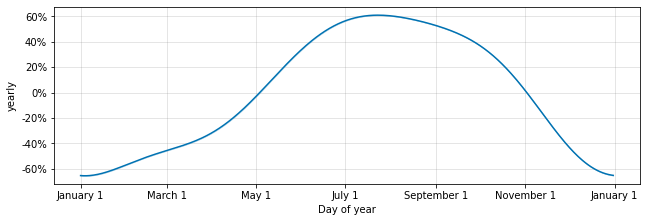

In [16]:
fig3 = plot_yearly(model, figsize=(10.5, 3.25))
plt.show()

In [17]:
df = pd.read_csv('../data/sunspots.csv', usecols=['Date', 'Monthly Mean Total Sunspot Number'])
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ['ds', 'y']

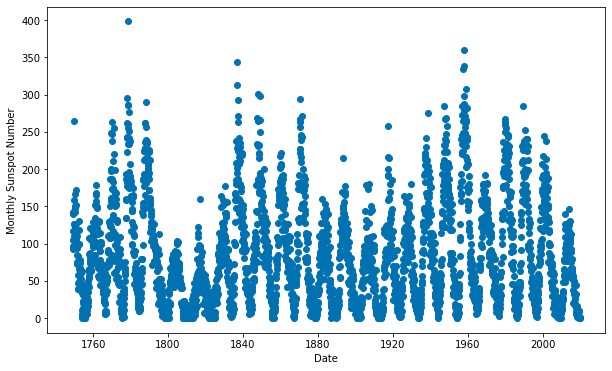

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(pd.to_datetime(df['ds']), df['y'], c='#0072B2')
plt.xlabel('Date')
plt.ylabel('Monthly Sunspot Number')
plt.show()

In [19]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=False)

In [20]:
model.add_seasonality(name='11-year cycle',
                      period=11 * 365.25,
                      fourier_order=5)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


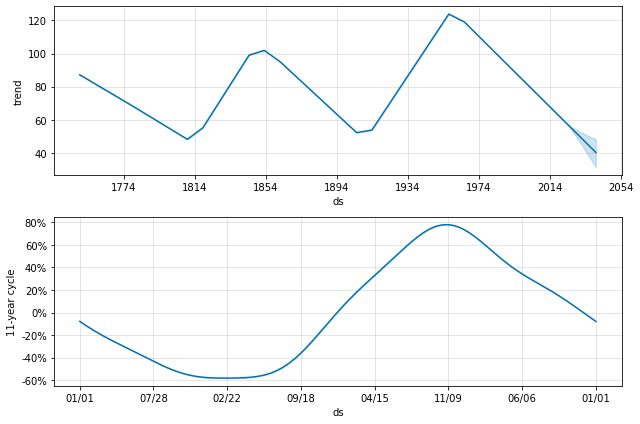

In [21]:
model.fit(df)
future = model.make_future_dataframe(periods=240, freq='M')
forecast = model.predict(future)
fig2 = model.plot_components(forecast)
plt.show()

In [22]:
model.seasonalities

OrderedDict([('11-year cycle',
              {'period': 4017.75,
               'fourier_order': 5,
               'prior_scale': 10.0,
               'mode': 'multiplicative',
               'condition_name': None})])

In [23]:
df = pd.read_csv('../data/divvy_hourly.csv')
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [24]:
def is_weekend(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 5 or date.dayofweek == 6)

df['weekend'] = df['ds'].apply(is_weekend)
df['weekday'] = ~df['ds'].apply(is_weekend)

df.head()

,ds,y,weekend,weekday
0,2014-01-01 01:00:00,1,False,True
1,2014-01-01 02:00:00,9,False,True
2,2014-01-01 03:00:00,4,False,True
3,2014-01-01 04:00:00,1,False,True
4,2014-01-01 07:00:00,2,False,True


In [25]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6,
                weekly_seasonality=6,
                daily_seasonality=False)

In [26]:
model.add_seasonality(name='daily_weekend',
                      period=1,
                      fourier_order=3,
                      condition_name='weekend')
model.add_seasonality(name='daily_weekday',
                      period=1,
                      fourier_order=3,
                      condition_name='weekday')

In [27]:
model.fit(df)
future = model.make_future_dataframe(periods=365 * 24, freq='h')
future['weekend'] = future['ds'].apply(is_weekend)
future['weekday'] = ~future['ds'].apply(is_weekend)

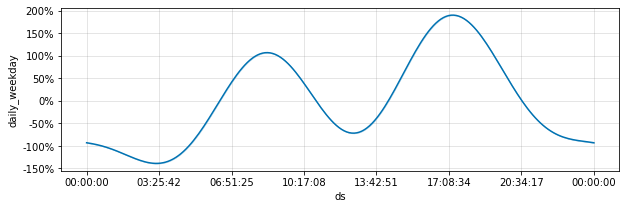

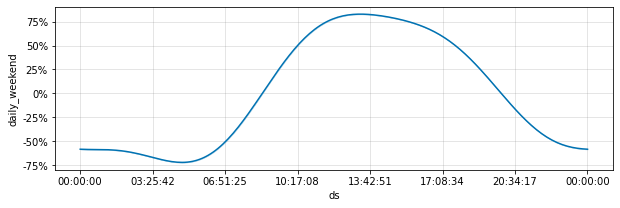

In [28]:
forecast = model.predict(future)
from fbprophet.plot import plot_seasonality
fig3 = plot_seasonality(model, 'daily_weekday', figsize=(10, 3))
plt.show()
fig4 = plot_seasonality(model, 'daily_weekend', figsize=(10, 3))
plt.show()

C:\Users\gregr\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.15605e-30): result may not be accurate.
  overwrite_a=True).T
C:\Users\gregr\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.02913e-24): result may not be accurate.
  overwrite_a=True).T


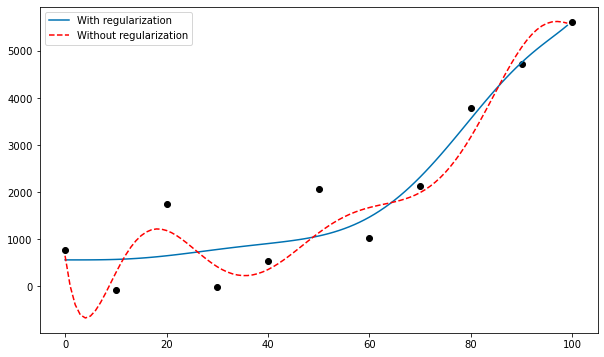

In [29]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(5)

x_pure = np.arange(0, 100, 1)
y_pure = (x_pure - 20) ** 2 + 50

num_points = 12
x0 = np.arange(0, num_points * 10, 10)
y0 = ((x0 - 20) ** 2 + 50) + np.random.normal(0, 700, num_points)

polynomial_features= PolynomialFeatures(degree=8)
x_poly = polynomial_features.fit_transform(x_pure.reshape(-1, 1))
x0_poly = polynomial_features.fit_transform(x0.reshape(-1, 1))

y1 = Ridge(alpha=0).fit(x0_poly, y0).predict(x_poly)
y2 = Ridge(alpha=1000).fit(x0_poly, y0).predict(x_poly)
y3 = Ridge(alpha=1000000000).fit(x0_poly, y0).predict(x_poly)

plt.figure(figsize=(10, 6))
plt.scatter(x0[:-1], y0[:-1], c='k')
plt.plot(x_pure, y3, label='With regularization', ls='-', c='#0072B2')
plt.plot(x_pure, y1, label='Without regularization', ls='--', c='r')
plt.legend()
plt.show()

In [30]:
df = pd.read_csv('../data/divvy_daily.csv')
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [31]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                seasonality_prior_scale=.01)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


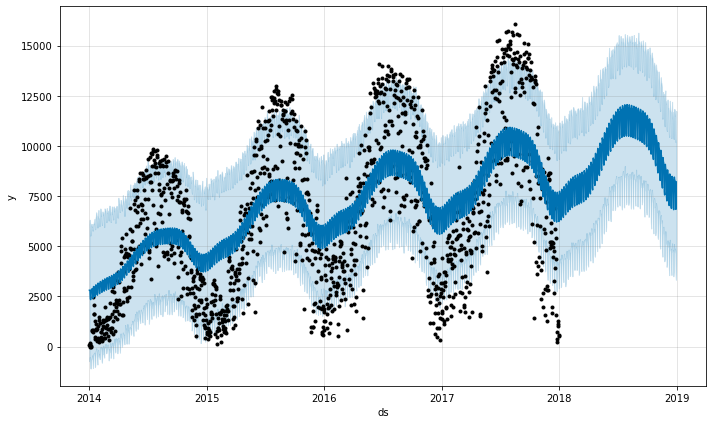

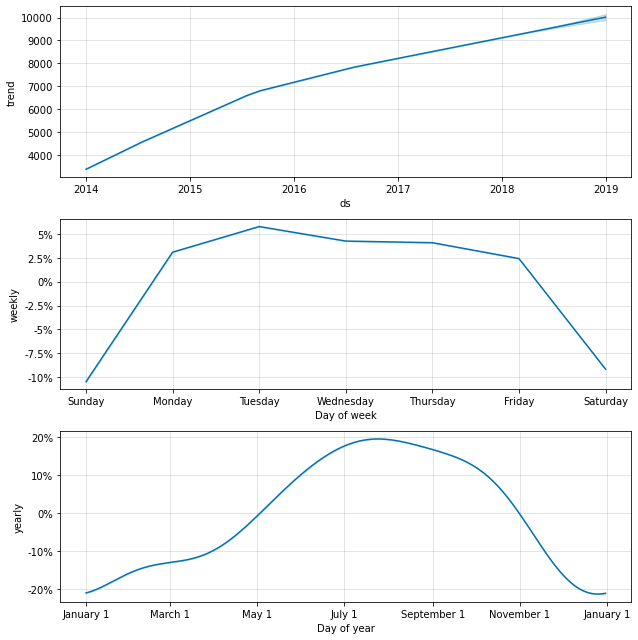

In [32]:
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()
fig2 = model.plot_components(forecast)
plt.show()

In [33]:
from fbprophet.plot import seasonality_plot_df, set_y_as_percent
from matplotlib.dates import (
    MonthLocator,
    num2date,
    AutoDateLocator,
    AutoDateFormatter,
)
from matplotlib.ticker import FuncFormatter

def plot_seasonality2(m, name, ax=None, uncertainty=True, figsize=(10, 6), ls='-', c='#0072B2', label=''):
    """Plot a custom seasonal component.
    Parameters
    ----------
    m: Prophet model.
    name: Seasonality name, like 'daily', 'weekly'.
    ax: Optional matplotlib Axes to plot on. One will be created if
        this is not provided.
    uncertainty: Optional boolean to plot uncertainty intervals, which will
        only be done if m.uncertainty_samples > 0.
    figsize: Optional tuple width, height in inches.
    Returns
    -------
    a list of matplotlib artists
    """
    artists = []
    if not ax:
        fig = plt.figure(facecolor='w', figsize=figsize)
        ax = fig.add_subplot(111)
    # Compute seasonality from Jan 1 through a single period.
    start = pd.to_datetime('2017-01-01 0000')
    period = m.seasonalities[name]['period']
    end = start + pd.Timedelta(days=period)
    plot_points = 200
    days = pd.to_datetime(np.linspace(start.value, end.value, plot_points))
    df_y = seasonality_plot_df(m, days)
    seas = m.predict_seasonal_components(df_y)
    artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls=ls,
                        c=c, label=label)
    if uncertainty and m.uncertainty_samples:
        artists += [ax.fill_between(
            df_y['ds'].dt.to_pydatetime(), seas[name + '_lower'],
            seas[name + '_upper'], color='#0072B2', alpha=0.2)]
    ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
    n_ticks = 8
    xticks = pd.to_datetime(np.linspace(start.value, end.value, n_ticks)
        ).to_pydatetime()
    ax.set_xticks(xticks)
    if period <= 2:
        fmt_str = '{dt:%T}'
    elif name == 'weekly':
        fmt_str = '{dt:%A}'
    elif period < 14:
        fmt_str = '{dt:%m}/{dt:%d} {dt:%R}'
    else:
        fmt_str = '{dt:%m}/{dt:%d}'
    ax.xaxis.set_major_formatter(FuncFormatter(
        lambda x, pos=None: fmt_str.format(dt=num2date(x))))
    ax.set_xlabel('ds')
    ax.set_ylabel(name)
    if m.seasonalities[name]['mode'] == 'multiplicative':
        ax = set_y_as_percent(ax)
    return artists

def compare_seasonality(seasonality,
                        model_list,
                        figsize=(10, 3),
                        ls=['-', '--', '-.', ':'],
                        c=['#0072B2', 'r', 'tab:orange', 'tab:green']):
    fig = plt.figure(facecolor='w', figsize=figsize)
    ax = fig.add_subplot(111)
    for model in range(len(model_list)):
        plot_seasonality2(model_list[model],
                          seasonality,
                          ax=ax,
                          ls=ls[model],
                          c=c[model],
                          label='Seasonality prior scale: {}'.format(model_list[model].seasonality_prior_scale))
    plt.legend()
    plt.show()

In [34]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                seasonality_prior_scale=10)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
model3 = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                seasonality_prior_scale=.01)
model3.fit(df)
future3 = model3.make_future_dataframe(periods=365)
forecast3 = model3.predict(future3)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
model4 = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                seasonality_prior_scale=.005)
model4.fit(df)
future4 = model4.make_future_dataframe(periods=365)
forecast4 = model4.predict(future4)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


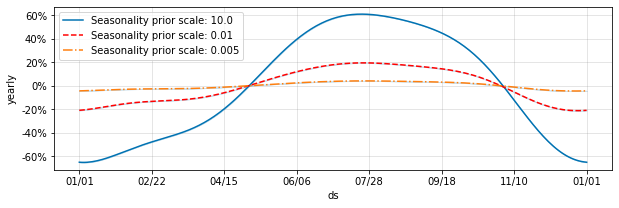

In [37]:
compare_seasonality('yearly', [model, model3, model4])

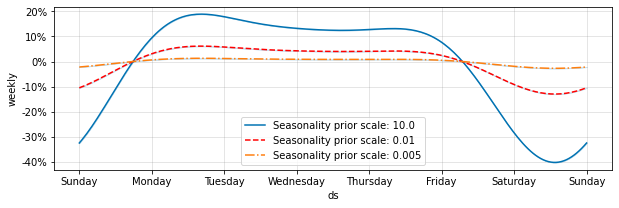

In [38]:
compare_seasonality('weekly', [model, model3, model4])

In [39]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                weekly_seasonality=False)

In [40]:
model.add_seasonality(name='weekly',
                      period=7,
                      fourier_order=4,
                      prior_scale=0.01)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


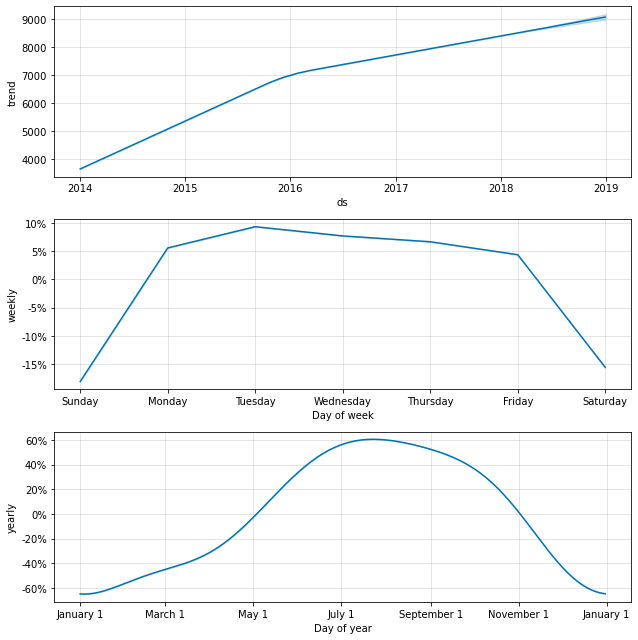

In [41]:
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig2 = model.plot_components(forecast)
plt.show()